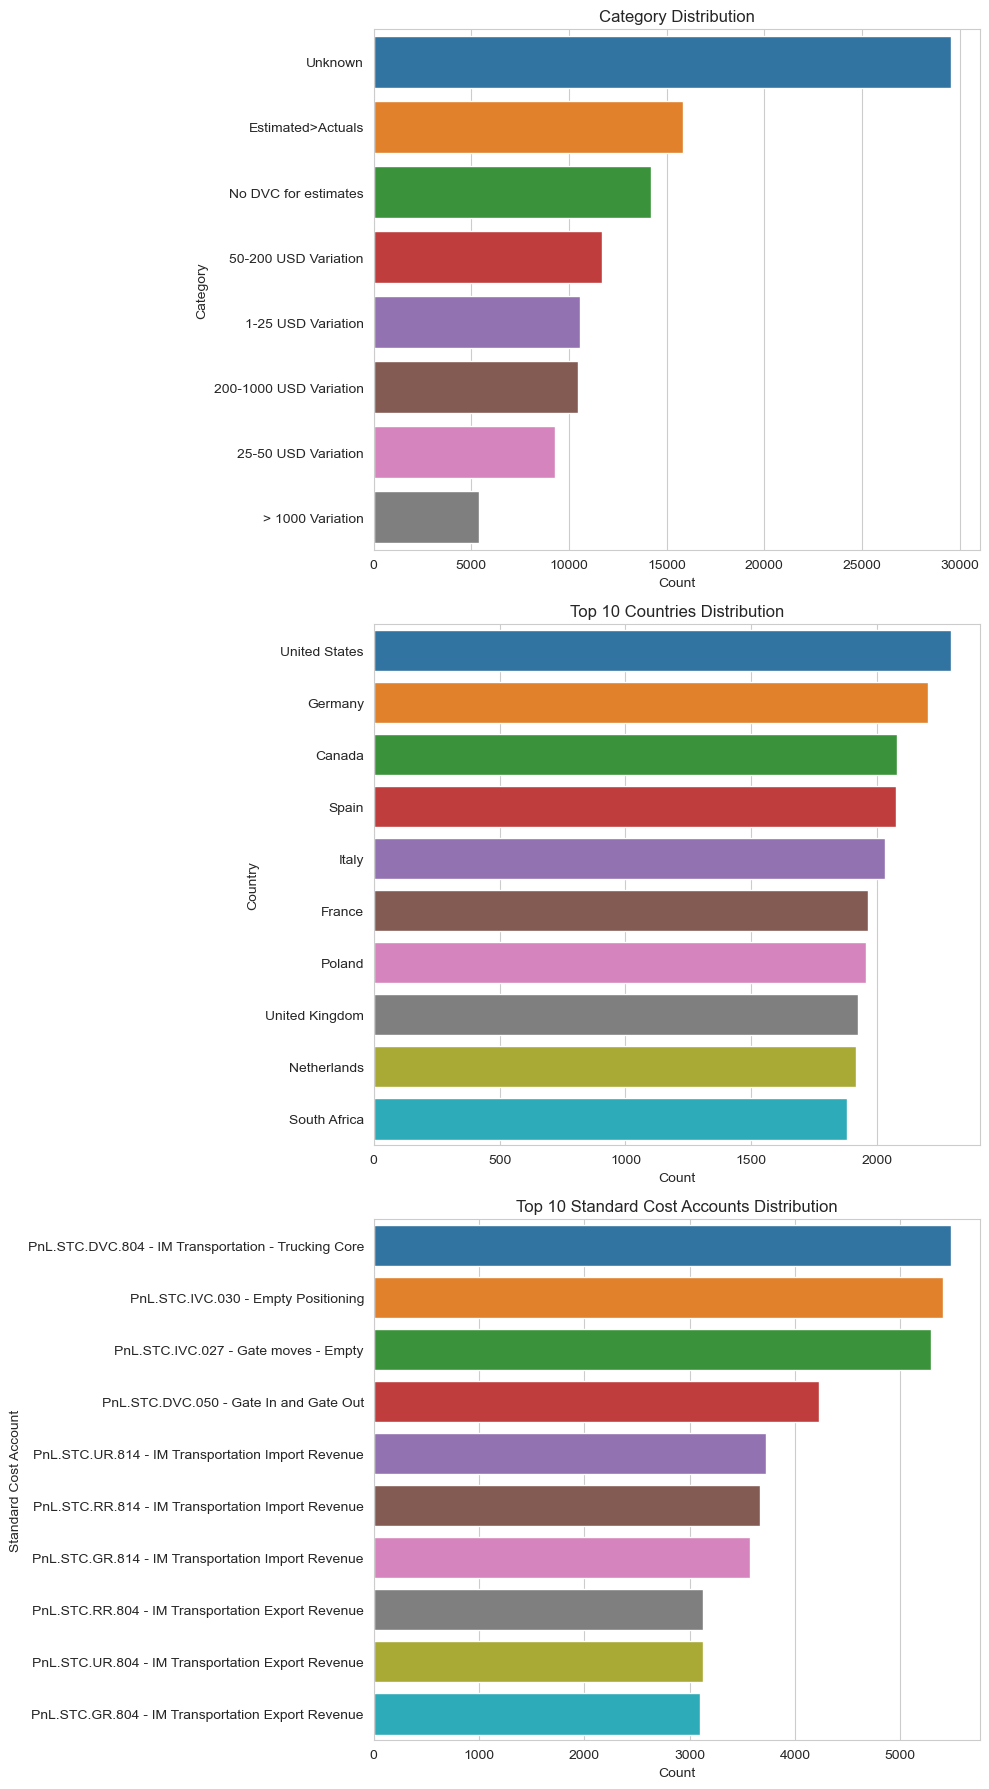

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'capstone_data.xlsx'
data = pd.read_excel(data_path)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the plots
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Category Distribution
sns.countplot(y=data['Category'], order = data['Category'].value_counts().index, ax=ax[0])
ax[0].set_title('Category Distribution')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Category')

# Country Distribution (Top 10)
top_countries = data['Location Activity Country Name'].value_counts().head(10).index
sns.countplot(y=data[data['Location Activity Country Name'].isin(top_countries)]['Location Activity Country Name'], 
              order = top_countries, ax=ax[1])
ax[1].set_title('Top 10 Countries Distribution')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Country')

# Standard Cost Account Distribution (Top 10)
top_accounts = data['Standard Cost Account'].value_counts().head(10).index
sns.countplot(y=data[data['Standard Cost Account'].isin(top_accounts)]['Standard Cost Account'], 
              order = top_accounts, ax=ax[2])
ax[2].set_title('Top 10 Standard Cost Accounts Distribution')
ax[2].set_xlabel('Count')
ax[2].set_ylabel('Standard Cost Account')

plt.tight_layout()
plt.show()


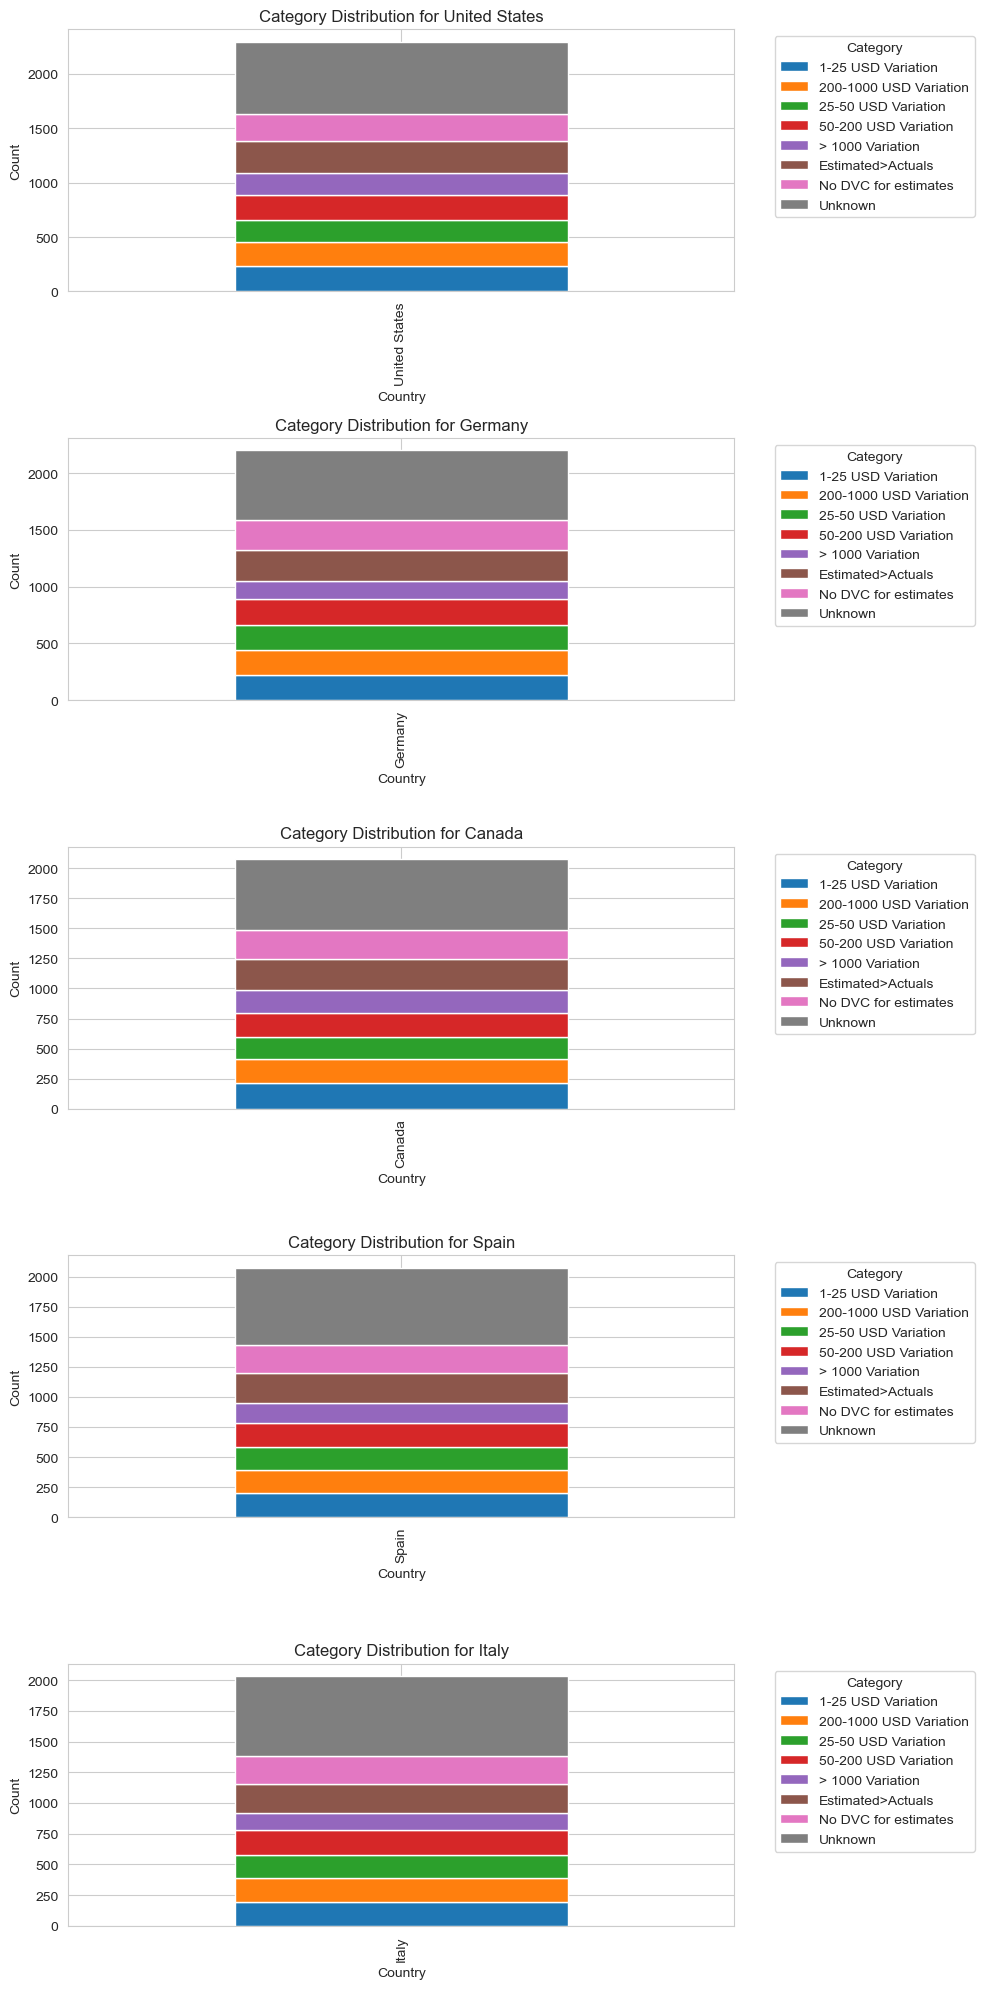

In [3]:

# Load the dataset
data = pd.read_excel('capstone_data.xlsx')

# Calculate the number of entries for each category within each country
category_country_distribution = data.groupby(['Location Activity Country Name', 'Category']).size().unstack(fill_value=0)

# Select the top 5 countries based on overall entry count
top_countries_by_entries = data['Location Activity Country Name'].value_counts().head(5).index

# Filter the category_country_distribution for these top countries
top_countries_distribution = category_country_distribution.loc[top_countries_by_entries]

# Plotting
fig, axes = plt.subplots(len(top_countries_by_entries), 1, figsize=(10, 20))
for i, country in enumerate(top_countries_by_entries):
    top_countries_distribution.loc[[country]].plot(kind='bar', stacked=True, ax=axes[i], legend=i==0)
    axes[i].set_title(f'Category Distribution for {country}')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Load the data
df = pd.read_excel('capstone_sample.xlsx')



In [5]:
# Convert 'Activity Month Year' to datetime
df['Activity Month Year'] = pd.to_datetime(df['Activity Month Year'], format='%b %Y')

# Filter data to last 12 months
current_date = pd.to_datetime('now')
last_12_months = current_date - pd.DateOffset(months=12)
df_filtered = df[df['Activity Month Year'] >= last_12_months]

# Calculate whether each shipment is loss-making
df_filtered['Loss/Profit'] = df_filtered['GP Analysis excl. Indirect Cost'].apply(lambda x: 'Loss' if x == 'Loss making excl. Indirect Cost' else 'Profit')

# Group by country
grouped_country = df_filtered.groupby('Location Activity Country Name')

# Calculate percentage of loss-making shipments, along with other statistics
summary_stats = grouped_country.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Actual Allocated Amount USD', 'mean'),
    max_actual_value=('Actual Allocated Amount USD', 'max'),
    min_actual_value=('Actual Allocated Amount USD', 'min'),
    total_actual_value=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

print("Summary Statistics of Actual Allocated amount Per Country:")
print(summary_stats)

# Calculate percentage of loss-making shipments, along with other statistics
summary_stats_estimate = grouped_country.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Estimated Allocated Amount USD', 'mean'),
    max_actual_value=('Estimated Allocated Amount USD', 'max'),
    min_actual_value=('Estimated Allocated Amount USD', 'min'),
    total_actual_value=('Estimated Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

print("Summary Statistics of Estimated Allocated amount Per Country:")
print(summary_stats_estimate)



# Calculate Gross Profit Margin Deviation
df['Profit Margin Deviation'] = ((df['Actual Allocated Amount USD'] - df['Estimated Allocated Amount USD']) / df['Estimated Allocated Amount USD']) * 100

# Group by country to summarize deviations
grouped_country_deviation = df.groupby('Location Activity Country Name')

# Categorize deviations into buckets
deviation_buckets = pd.cut(df['Profit Margin Deviation'], bins=[-float('inf'), -20, -10, -5, 5, 10, 20, float('inf')], labels=['<-20%', '-20% to -10%', '-10% to -5%', '-5% to 5%', '5% to 10%', '10% to 20%', '>20%'])

# Add deviation buckets to the DataFrame
df['Deviation Bucket'] = deviation_buckets

# Group by country to summarize deviations including volumes and value in USD
summary_deviation = grouped_country_deviation.agg(
    avg_deviation=('Profit Margin Deviation', 'mean'),
    total_value_usd=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

# Count deviation buckets per country
deviation_bucket_counts = grouped_country_deviation['Deviation Bucket'].value_counts().unstack(fill_value=0)

print("\nSummary Deviation Statistics Per Country:")
print(summary_deviation)
print("\nDeviation Bucket Counts Per Country:")
print(deviation_bucket_counts)

C:\Users\Sherine\AppData\Local\Temp\ipykernel_29024\4166820046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Loss/Profit'] = df_filtered['GP Analysis excl. Indirect Cost'].apply(lambda x: 'Loss' if x == 'Loss making excl. Indirect Cost' else 'Profit')


Summary Statistics of Actual Allocated amount Per Country:
                                loss_percentage  avg_actual_value  \
Location Activity Country Name                                      
Albania                                4.123711        763.362273   
Algeria                                0.000000       1490.356423   
American Samoa                         0.000000       -488.983787   
Andorra                               27.536232         34.434899   
Angola                                 0.000000       1970.803783   
...                                         ...               ...   
Vietnam                               12.426614      -3283.551110   
Virgin Islands (US)                    0.000000               NaN   
Yemen                                  0.000000       1139.949983   
Zambia                                17.497956       6201.299598   
Zimbabwe                              21.077441       2627.268647   

                                max_actual_

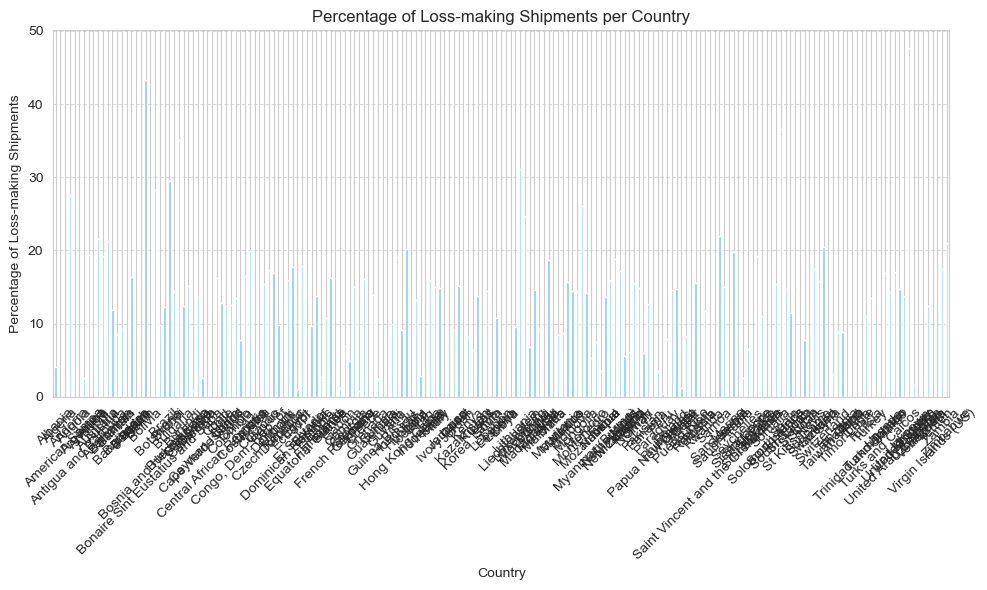

<Figure size 1200x800 with 0 Axes>

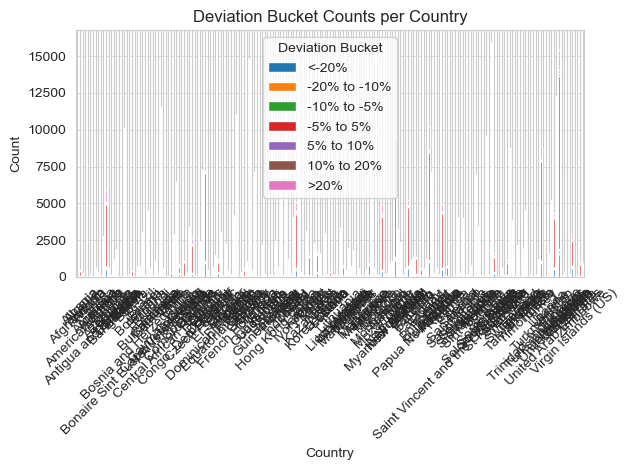

In [6]:
import matplotlib.pyplot as plt

# Plotting percentage of loss-making shipments per country
plt.figure(figsize=(10, 6))
summary_stats['loss_percentage'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Loss-making Shipments per Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Loss-making Shipments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting deviation bucket counts per country
plt.figure(figsize=(12, 8))
deviation_bucket_counts.plot(kind='bar', stacked=True)
plt.title('Deviation Bucket Counts per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deviation Bucket')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


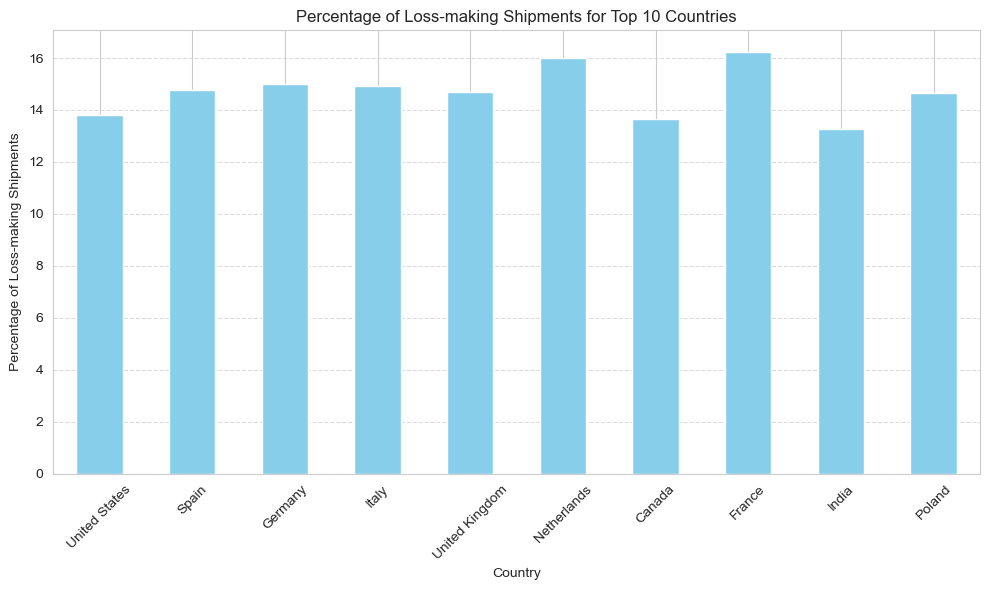

<Figure size 1200x800 with 0 Axes>

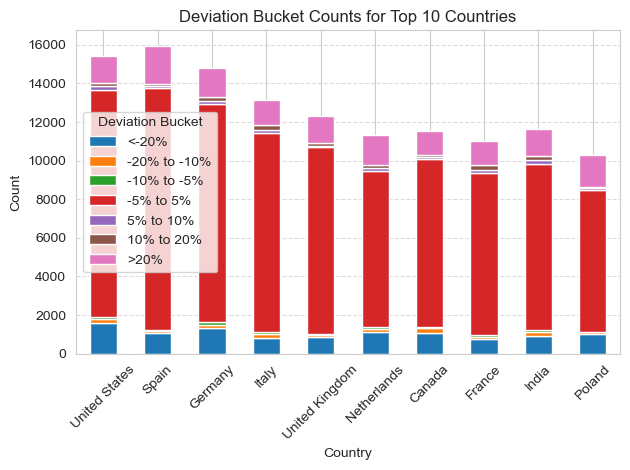

In [7]:
import matplotlib.pyplot as plt

# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter summary statistics and deviation bucket counts for the top 10 countries
top_10_summary_stats = summary_stats.loc[top_10_countries]
top_10_deviation_bucket_counts = deviation_bucket_counts.loc[top_10_countries]

# Plotting percentage of loss-making shipments for top 10 countries
plt.figure(figsize=(10, 6))
top_10_summary_stats['loss_percentage'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Loss-making Shipments for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Loss-making Shipments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting deviation bucket counts for top 10 countries
plt.figure(figsize=(12, 8))
top_10_deviation_bucket_counts.plot(kind='bar', stacked=True)
plt.title('Deviation Bucket Counts for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deviation Bucket')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


United States: The United States has a significant number of shipments across all deviation categories, with the majority appearing to be in the 5% to 10% and >20% positive deviation buckets, indicating a tendency towards higher than expected profits.

Spain: Spain shows a notable concentration in the -5% to 5% bucket, suggesting that many shipments performed close to expectations. However, there's also a considerable count in the >20% deviation, indicating some highly profitable shipments.

Germany: Germany has a relatively balanced distribution across the deviation buckets, with a substantial presence in the 5% to 10% and >20% positive deviation buckets, similar to the United States.

Italy: Italy has a large number of shipments in the >20% positive deviation bucket, suggesting a good number of shipments performed much better than expected.

United Kingdom: The United Kingdom has a high count in the 5% to 10% positive deviation bucket and also a significant count in the >20% deviation bucket, indicating that a good portion of shipments were more profitable than expected.

Canada: Canada has a notable count in the -5% to 5% range, showing consistency in meeting profit expectations. There's also a considerable portion in the >20% positive deviation bucket.

Netherlands: The Netherlands shows a spread across negative and positive deviation buckets, with a high count in the >20% bucket, indicating several shipments were much more profitable than expected.

France: France has a significant count in the -5% to 5% bucket, indicating many shipments were close to expected profitability. It also shows a considerable count in the 10% to 20% and >20% buckets.

India: India stands out with the highest count in the >20% positive deviation bucket among all countries shown, suggesting that a substantial number of shipments were highly profitable compared to expectations.

Poland: Poland has a spread similar to the Netherlands and France, with a significant portion of shipments in the 10% to 20% and >20% positive deviation buckets.

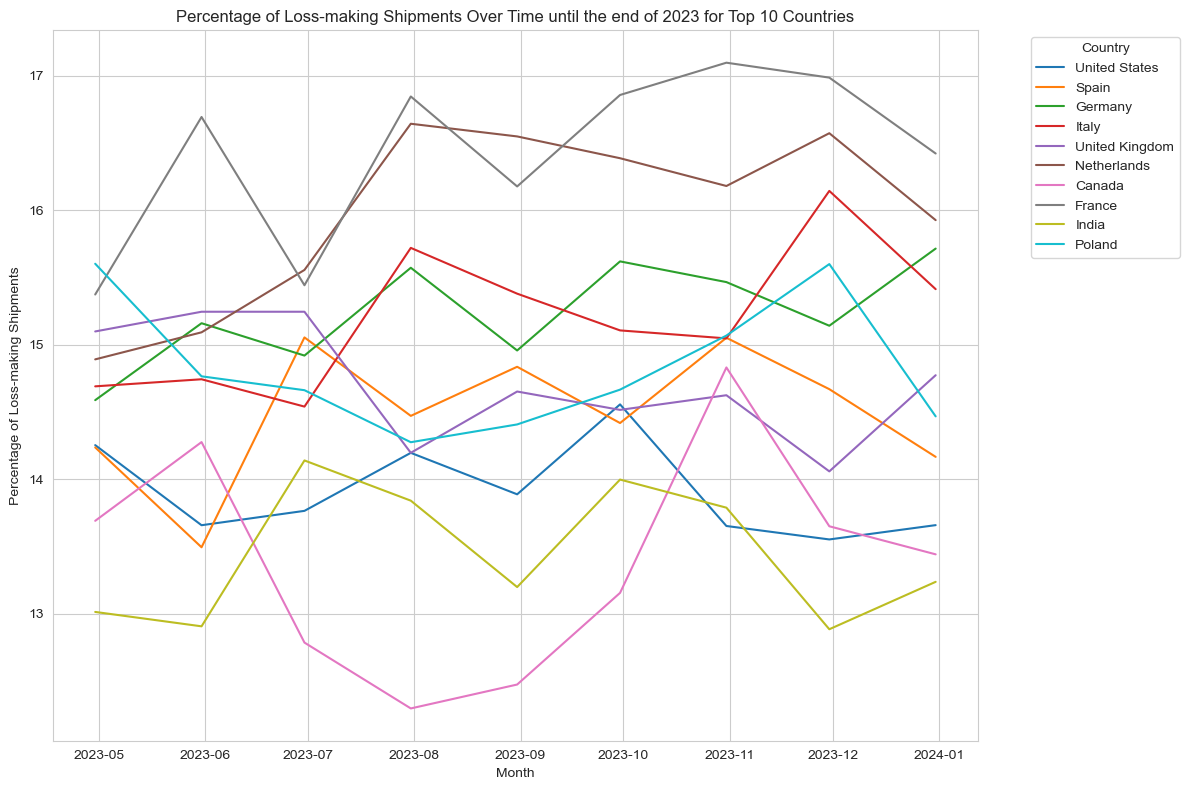

In [8]:
import matplotlib.pyplot as plt

# Filter data until the end of 2023
df_filtered_until_2023 = df_filtered[df_filtered['Activity Month Year'] <= pd.to_datetime('2023-12-31')]

# Group by country and month to calculate statistics over time until the end of 2023
grouped_country_time_until_2023 = df_filtered_until_2023.groupby(['Location Activity Country Name', pd.Grouper(key='Activity Month Year', freq='M')])

# Calculate statistics over time until the end of 2023
stats_over_time_until_2023 = grouped_country_time_until_2023.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Actual Allocated Amount USD', 'mean'),
    max_actual_value=('Actual Allocated Amount USD', 'max'),
    min_actual_value=('Actual Allocated Amount USD', 'min'),
    total_actual_value=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter statistics over time until the end of 2023 for the top 10 countries
top_10_stats_over_time_until_2023 = stats_over_time_until_2023.loc[top_10_countries]

# Plotting percentage of loss-making shipments over time until the end of 2023 for top 10 countries
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    country_data_until_2023 = top_10_stats_over_time_until_2023.loc[country]
    plt.plot(country_data_until_2023.index, country_data_until_2023['loss_percentage'], label=country)

plt.title('Percentage of Loss-making Shipments Over Time until the end of 2023 for Top 10 Countries')
plt.xlabel('Month')
plt.ylabel('Percentage of Loss-making Shipments')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


% of loss making shipment per country over last 12 months (average, max and minimum value) to baseline a country performance including volumes and value in USD

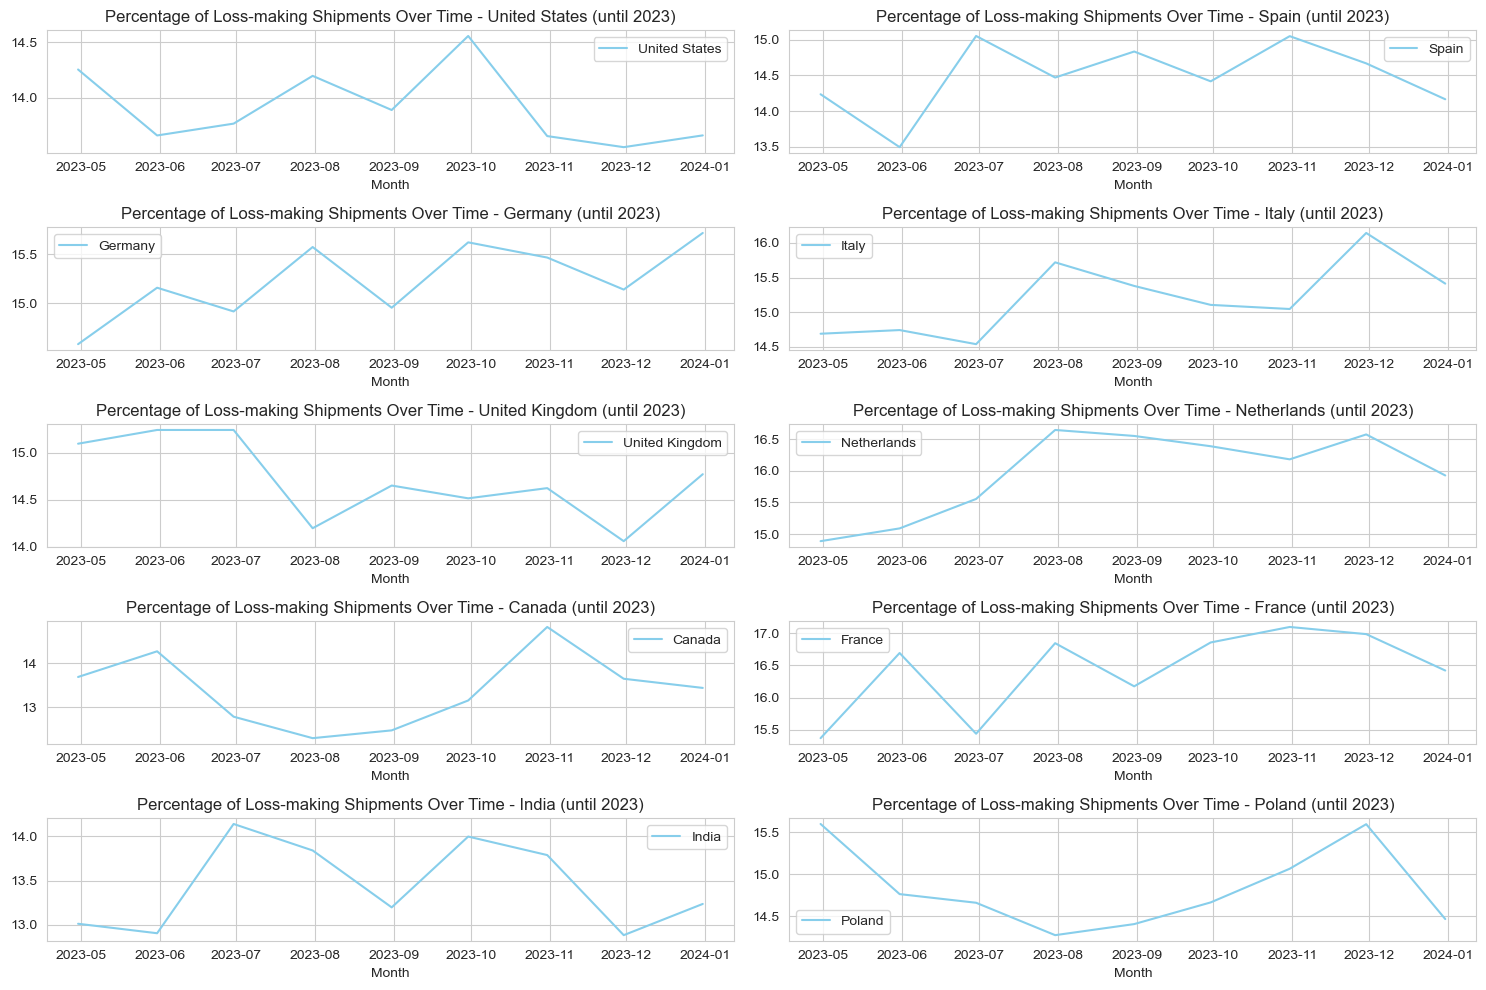

In [13]:
import matplotlib.pyplot as plt

# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter data until the end of 2023
df_filtered_until_2023 = df_filtered[df_filtered['Activity Month Year'] <= pd.to_datetime('2023-12-31')]

# Group by country and month to calculate statistics over time until the end of 2023
grouped_country_time_until_2023 = df_filtered_until_2023.groupby(['Location Activity Country Name', pd.Grouper(key='Activity Month Year', freq='M')])

# Calculate statistics over time until the end of 2023
stats_over_time_until_2023 = grouped_country_time_until_2023.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Actual Allocated Amount USD', 'mean'),
    max_actual_value=('Actual Allocated Amount USD', 'max'),
    min_actual_value=('Actual Allocated Amount USD', 'min'),
    total_actual_value=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

# Plotting percentage of loss-making shipments over time until the end of 2023 for each of the top 10 countries
plt.figure(figsize=(15, 10))
for i, country in enumerate(top_10_countries, 1):
    plt.subplot(5, 2, i)
    country_data = stats_over_time_until_2023.loc[country]
    plt.plot(country_data.index, country_data['loss_percentage'], label=country, color='skyblue')
    plt.title(f'Percentage of Loss-making Shipments Over Time - {country} (until 2023)')
    plt.xlabel('Month')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


United States: The percentage of loss-making shipments shows a decrease over time, suggesting an improvement in the profitability of shipments or operational efficiencies.

Spain: The line graph indicates volatility, with peaks and troughs. There's a notable peak around July 2023, which suggests a period of increased loss-making shipments, followed by a decrease.

Germany: There are fluctuations, but there's an overall increasing trend in the percentage of loss-making shipments, which could indicate worsening conditions or increased operational costs.

Italy: The graph for Italy shows a significant spike in loss-making shipments around November 2023, implying a period of considerable losses, but this is followed by a sharp decrease.

United Kingdom: The percentage of loss-making shipments is relatively stable with slight fluctuations, indicating consistent performance in terms of profitability.

Canada: The trend for Canada is generally downward, with a few increases, suggesting an overall improvement in reducing loss-making shipments.

Netherlands: The Netherlands shows a steady increase in the percentage of loss-making shipments, indicating a potential area of concern that may require attention to mitigate rising losses.

France: The graph for France exhibits high volatility with several peaks, indicating periods of increased loss-making shipments that could be due to external market factors or internal inefficiencies.

India: There's an overall downward trend in the percentage of loss-making shipments, suggesting that the situation is improving over time.

Poland: Poland's graph shows a significant peak around November 2023, similar to Italy, indicating a period of concern. However, there's a sharp decline after this peak, suggesting a recovery or corrective measures taken.



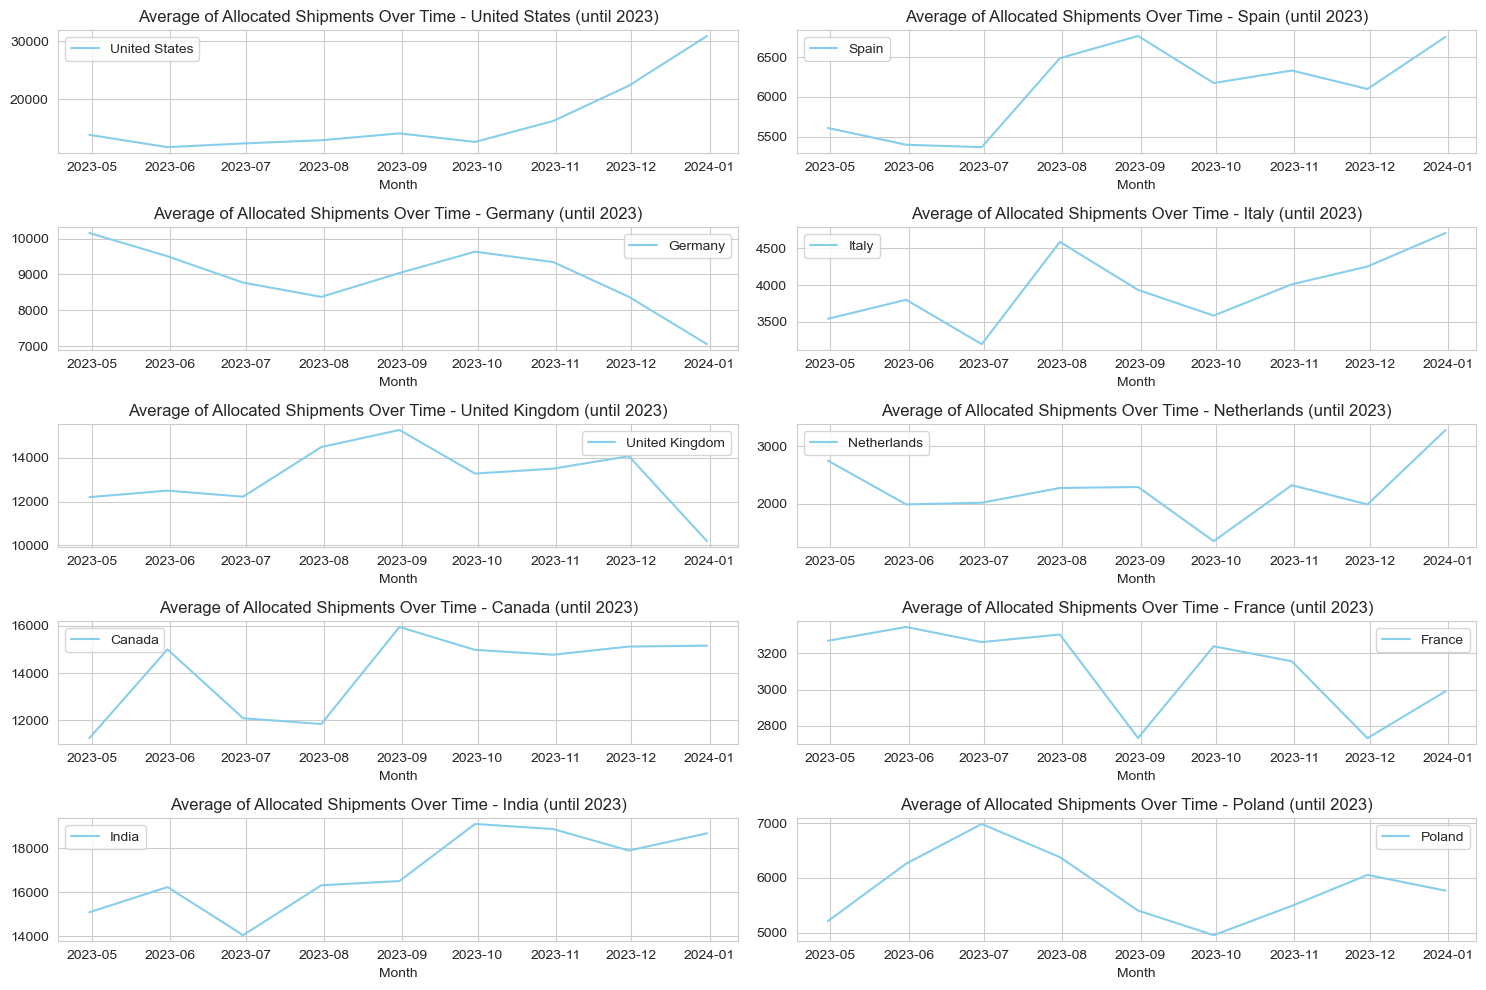

In [14]:
# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter data until the end of 2023
df_filtered_until_2023 = df_filtered[df_filtered['Activity Month Year'] <= pd.to_datetime('2023-12-31')]

# Group by country and month to calculate statistics over time until the end of 2023
grouped_country_time_until_2023 = df_filtered_until_2023.groupby(['Location Activity Country Name', pd.Grouper(key='Activity Month Year', freq='M')])

# Calculate statistics over time until the end of 2023
stats_over_time_until_2023 = grouped_country_time_until_2023.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Actual Allocated Amount USD', 'mean'),
    max_actual_value=('Actual Allocated Amount USD', 'max'),
    min_actual_value=('Actual Allocated Amount USD', 'min'),
    total_actual_value=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

# Plotting percentage of loss-making shipments over time until the end of 2023 for each of the top 10 countries
plt.figure(figsize=(15, 10))
for i, country in enumerate(top_10_countries, 1):
    plt.subplot(5, 2, i)
    country_data = stats_over_time_until_2023.loc[country]
    plt.plot(country_data.index, country_data['avg_actual_value'], label=country, color='skyblue')
    plt.title(f'Average of Allocated Shipments Over Time - {country} (until 2023)')
    plt.xlabel('Month')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

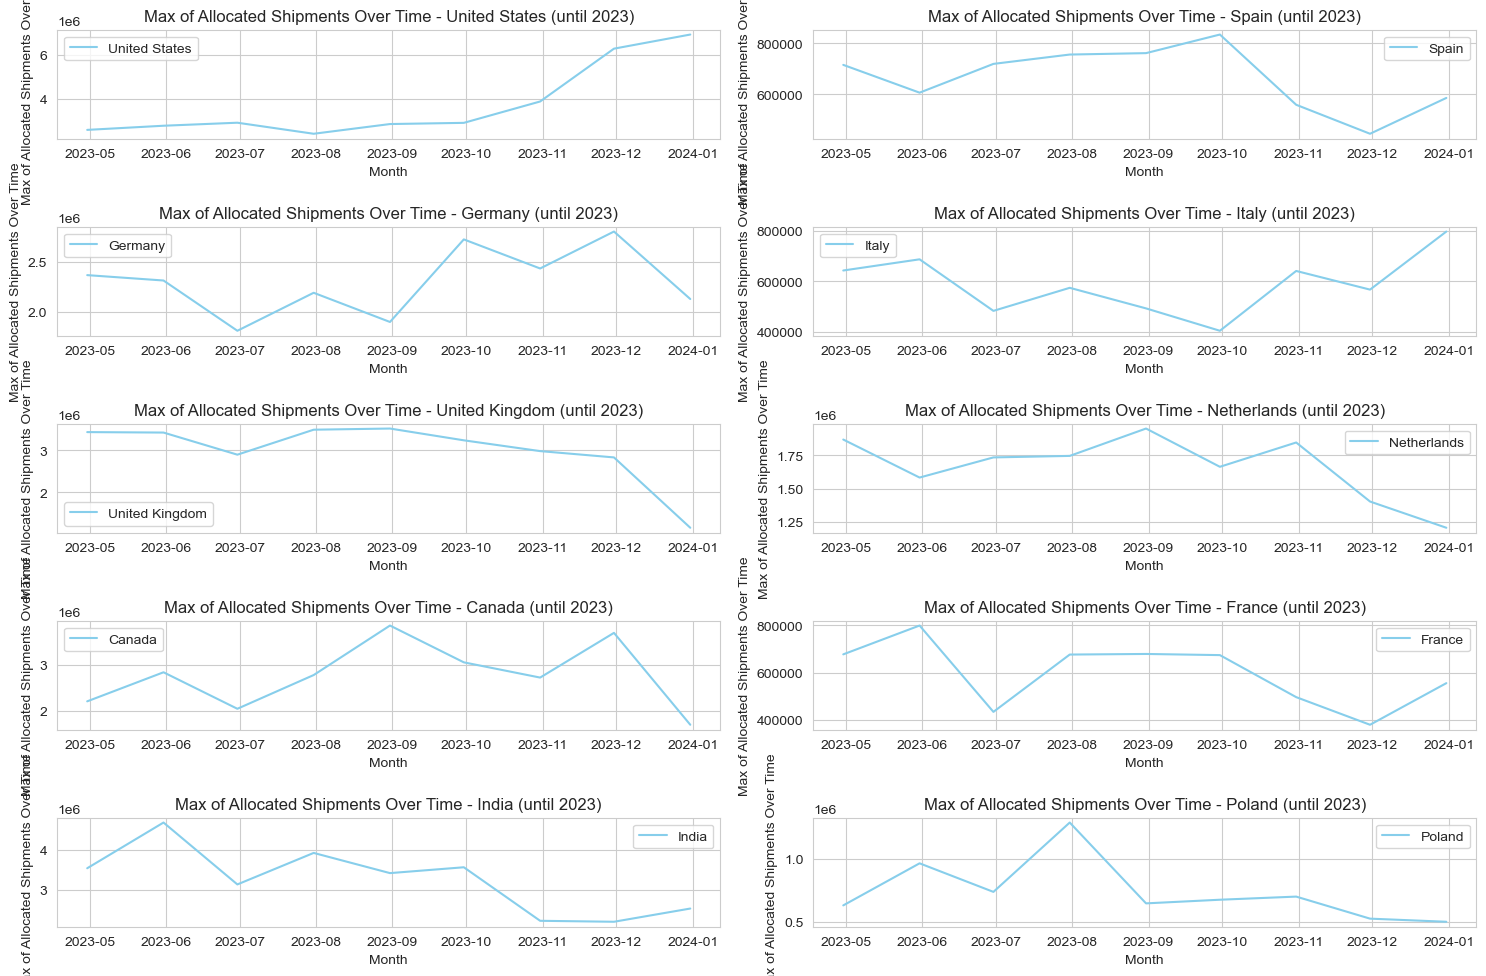

In [10]:
# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter data until the end of 2023
df_filtered_until_2023 = df_filtered[df_filtered['Activity Month Year'] <= pd.to_datetime('2023-12-31')]

# Group by country and month to calculate statistics over time until the end of 2023
grouped_country_time_until_2023 = df_filtered_until_2023.groupby(['Location Activity Country Name', pd.Grouper(key='Activity Month Year', freq='M')])

# Calculate statistics over time until the end of 2023
stats_over_time_until_2023 = grouped_country_time_until_2023.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Actual Allocated Amount USD', 'mean'),
    max_actual_value=('Actual Allocated Amount USD', 'max'),
    min_actual_value=('Actual Allocated Amount USD', 'min'),
    total_actual_value=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

# Plotting percentage of loss-making shipments over time until the end of 2023 for each of the top 10 countries
plt.figure(figsize=(15, 10))
for i, country in enumerate(top_10_countries, 1):
    plt.subplot(5, 2, i)
    country_data = stats_over_time_until_2023.loc[country]
    plt.plot(country_data.index, country_data['max_actual_value'], label=country, color='skyblue')
    plt.title(f'Max of Allocated Shipments Over Time - {country} (until 2023)')
    plt.xlabel('Month')
    plt.ylabel('Max of Allocated Shipments Over Time')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

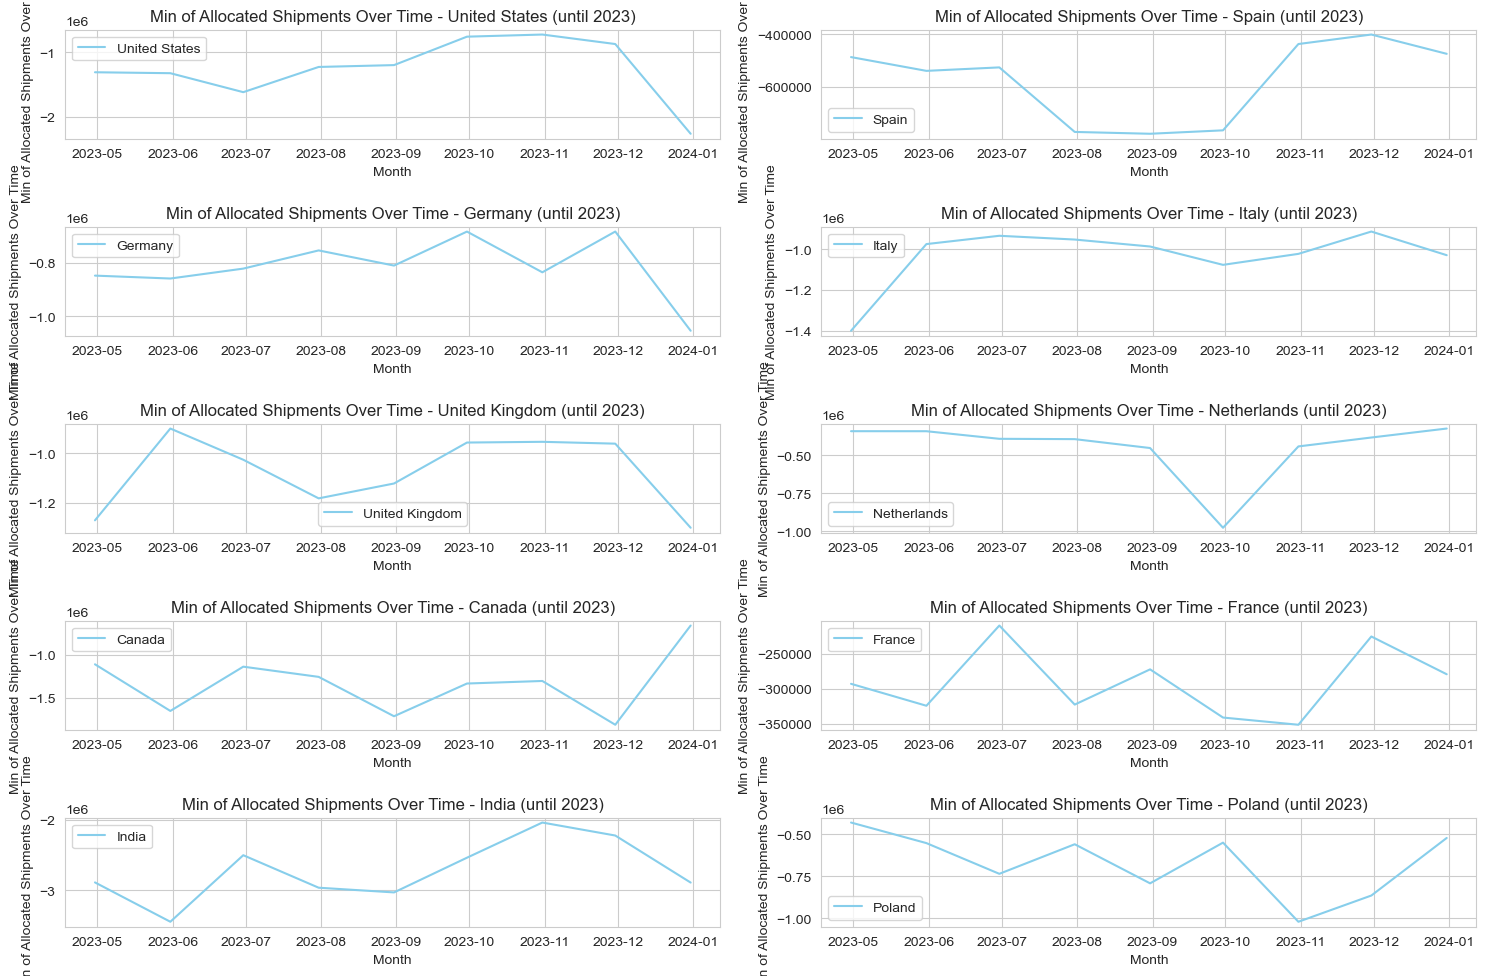

In [11]:
# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter data until the end of 2023
df_filtered_until_2023 = df_filtered[df_filtered['Activity Month Year'] <= pd.to_datetime('2023-12-31')]

# Group by country and month to calculate statistics over time until the end of 2023
grouped_country_time_until_2023 = df_filtered_until_2023.groupby(['Location Activity Country Name', pd.Grouper(key='Activity Month Year', freq='M')])

# Calculate statistics over time until the end of 2023
stats_over_time_until_2023 = grouped_country_time_until_2023.agg(
    loss_percentage=('Loss/Profit', lambda x: (x == 'Loss').mean() * 100),
    avg_actual_value=('Actual Allocated Amount USD', 'mean'),
    max_actual_value=('Actual Allocated Amount USD', 'max'),
    min_actual_value=('Actual Allocated Amount USD', 'min'),
    total_actual_value=('Actual Allocated Amount USD', 'sum'),
    total_shipments=('Category', 'count')
)

# Plotting percentage of loss-making shipments over time until the end of 2023 for each of the top 10 countries
plt.figure(figsize=(15, 10))
for i, country in enumerate(top_10_countries, 1):
    plt.subplot(5, 2, i)
    country_data = stats_over_time_until_2023.loc[country]
    plt.plot(country_data.index, country_data['min_actual_value'], label=country, color='skyblue')
    plt.title(f'Min of Allocated Shipments Over Time - {country} (until 2023)')
    plt.xlabel('Month')
    plt.ylabel('Min of Allocated Shipments Over Time')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

% of gross profit margin (deviation between estimated vs actual profit) broken down at country level to baseline country performance including volumes and value in USD
Break up deviation into small buckets like 5%, 10%-20% etc.

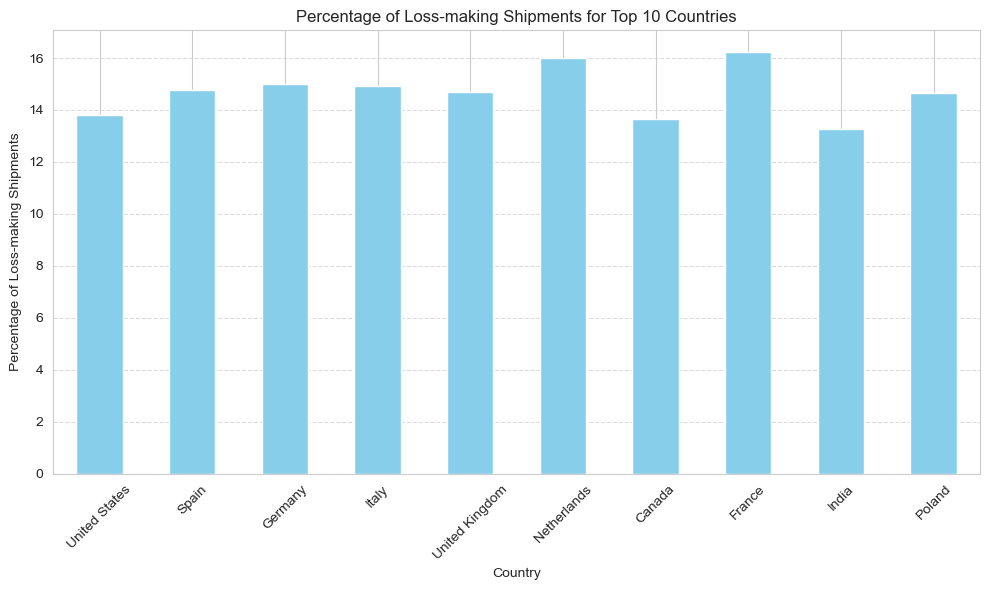

<Figure size 1200x800 with 0 Axes>

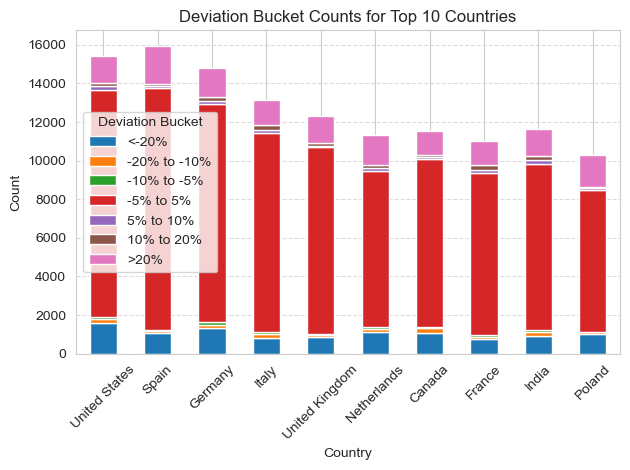

In [12]:
import matplotlib.pyplot as plt

# Select top 10 countries based on total shipments
top_10_countries = summary_stats['total_shipments'].nlargest(10).index

# Filter summary statistics and deviation bucket counts for the top 10 countries
top_10_summary_stats = summary_stats.loc[top_10_countries]
top_10_deviation_bucket_counts = deviation_bucket_counts.loc[top_10_countries]

# Plotting percentage of loss-making shipments for top 10 countries
plt.figure(figsize=(10, 6))
top_10_summary_stats['loss_percentage'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Loss-making Shipments for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Loss-making Shipments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting deviation bucket counts for top 10 countries
plt.figure(figsize=(12, 8))
top_10_deviation_bucket_counts.plot(kind='bar', stacked=True)
plt.title('Deviation Bucket Counts for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deviation Bucket')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
# Find the country with the highest revenue
country_with_highest_revenue = summary_stats['total_actual_value'].idxmax()

print("Country with the highest revenue:", country_with_highest_revenue)


Country with the highest revenue: United States


In [26]:
# Find the country with the highest revenue
country_with_highest_revenue = summary_stats_estimate['total_actual_value'].idxmax()

print("Country with the highest revenue:", country_with_highest_revenue)

Country with the highest revenue: United States


In [17]:
summary_stats.to_csv('summary.csv')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
def load_data():
    data = pd.read_excel('capstone_sample.xlsx')
    data['Activity Month Year'] = pd.to_datetime(data['Activity Month Year'])
    data['Difference'] = data['Actual Allocated Amount USD'] - data['Estimated Allocated Amount USD']
    return data

# Load data
df = load_data()

df_2023 = df[df['Activity Month Year'].dt.year == 2023]
# Assuming 'top_10_countries' is a list of the top 10 countries by some metric
top_10_countries = df_2023['Location Activity Country Name'].value_counts().nlargest(10).index

# Prepare the grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, country in enumerate(top_10_countries):
    # Filter the DataFrame for the selected country
    df_country = df_2023[df_2023['Location Activity Country Name'] == country]

    # Group by month and calculate the average difference
    grouped_by_month = df_country.groupby(pd.Grouper(key='Activity Month Year', freq='M'))
    avg_difference_by_month = grouped_by_month['Difference'].mean()
    avg_difference_by_month.to_csv('avg_difference_by_month.csv')

    # Plotting the average monthly cost difference for the country
    axes[i].plot(avg_difference_by_month.index, avg_difference_by_month, marker='o', linestyle='-')
    axes[i].set_title(country)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Difference (USD)')
    axes[i].grid(True)

    # Label each data point with its value
    for x, y in zip(avg_difference_by_month.index, avg_difference_by_month):
        label = "{:.2f}".format(y)
        axes[i].annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust the layout
plt.tight_layout()


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.